In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# functions for furthre useage
def mark_values(x_axis, y_axis):
    """
    mark the actul values on the plot
    :param x_axis: a list of x-axis values
    :type x_axis: list
    """
    for x, y in zip(x_axis, y_axis):
        label = "{:.2f}".format(y)
        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center')
def accumu_perp_plots(share, data_type):
    xasis = list(range(1, 13))
    
    con_train_mean_list = []
    con_test_mean_list = []
    dem_train_mean_list = []
    dem_test_mean_list = []
    diff_train_list = []
    diff_test_list = []
    ratio_train_list = []
    ratio_test_list = []
    for layer in range(1, 13):
        train_file = "../ppl/train_accumu_first_{}_{}_layer_{}.tsv".format(
            share, data_type, layer)
        test_file = "../ppl/test_accumu_first_{}_{}_layer_{}.tsv".format(
            share, data_type, layer)
        train_df = pd.read_csv(train_file, sep="\t")
        test_df = pd.read_csv(test_file, sep="\t")
        con_train_mean = np.mean(train_df[train_df["label"] == 0]["con_perp"].values)
        con_test_mean = np.mean(test_df[test_df["label"] == 0]["con_perp"].values)
        dem_train_mean = np.mean(train_df[train_df["label"] == 1]["dem_perp"].values)
        dem_test_mean = np.mean(test_df[test_df["label"] == 1]["dem_perp"].values)
        con_train_mean_list.append(con_train_mean)
        con_test_mean_list.append(con_test_mean)
        dem_train_mean_list.append(dem_train_mean)
        dem_test_mean_list.append(dem_test_mean)
        diff_train_list.append(np.abs(con_train_mean - dem_train_mean))
        diff_test_list.append(np.abs(con_test_mean - dem_test_mean))
        ratio_train_list.append(np.abs(con_train_mean/dem_train_mean))
        ratio_test_list.append(np.abs(con_test_mean/dem_test_mean))
    
    fig = plt.figure()
    plt.subplot(1, 2, 1)
    plt.plot(xasis, con_train_mean_list, label="control perplexity on training set")
    plt.plot(xasis, con_test_mean_list, label="control perplexity on test set")
    plt.plot(xasis, dem_train_mean_list, label="dementia perplexity on training set")
    plt.plot(xasis, dem_test_mean_list, label="dementia perplexity on test set")
    plt.title("mean perplexity comparision on cumulative method on {} dataset".format(data_type))
    plt.legend()
    plt.xticks(np.arange(min(xasis), max(xasis)+1, 1.0))
    mark_values(xasis, con_train_mean_list)
    mark_values(xasis, con_test_mean_list)
    mark_values(xasis, dem_train_mean_list)
    mark_values(xasis, dem_test_mean_list)
    
    plt.subplot(1, 2, 2)
    plt.plot(xasis, diff_train_list, label="c-d perplexity on training set")
    plt.plot(xasis, diff_test_list, label="c-d perplexity on test set")
    plt.plot(xasis, ratio_train_list, label="c/d perplexity on training set")
    plt.plot(xasis, ratio_test_list, label="c/d perplexity on test set")
    plt.title("mean perplexity comparision on cumulative method on {} dataset".format(data_type))
    plt.legend()
    plt.xticks(np.arange(min(xasis), max(xasis)+1, 1.0))
    mark_values(xasis, diff_train_list)
    mark_values(xasis, diff_test_list)
    mark_values(xasis, ratio_train_list)
    mark_values(xasis, ratio_test_list)
    plt.show()
    
    
def comb_perp_plots(data_type):
    con_train_mean_list = []
    con_test_mean_list = []
    dem_train_mean_list = []
    dem_test_mean_list = []
    diff_train_list = []
    diff_test_list = []
    ratio_train_list = []
    ratio_test_list = []
    xasis = ["25%", "50%", "75%", "100%"]
    for item in xasis:
        train_file = "../ppl/train_comb_first_{}_{}.tsv".format(
            item[:-1], data_type)
        test_file = "../ppl/test_comb_first_{}_{}.tsv".format(
            item[:-1], data_type)
        train_df = pd.read_csv(train_file, sep="\t")
        test_df = pd.read_csv(test_file, sep="\t")
        con_train_mean = np.mean(train_df[train_df["label"] == 0]["con_perp"].values)
        con_test_mean = np.mean(test_df[test_df["label"] == 0]["con_perp"].values)
        dem_train_mean = np.mean(train_df[train_df["label"] == 1]["dem_perp"].values)
        dem_test_mean = np.mean(test_df[test_df["label"] == 1]["dem_perp"].values)
        con_train_mean_list.append(con_train_mean)
        con_test_mean_list.append(con_test_mean)
        dem_train_mean_list.append(dem_train_mean)
        dem_test_mean_list.append(dem_test_mean)
        diff_train_list.append(np.abs(con_train_mean - dem_train_mean))
        diff_test_list.append(np.abs(con_test_mean - dem_test_mean))
        ratio_train_list.append(np.abs(con_train_mean/dem_train_mean))
        ratio_test_list.append(np.abs(con_test_mean/dem_test_mean))

    fig = plt.figure()
    plt.subplot(1, 2, 1)
    plt.plot(xasis, con_train_mean_list, label="control perplexity on training set")
    plt.plot(xasis, con_test_mean_list, label="control perplexity on test set")
    plt.plot(xasis, dem_train_mean_list, label="dementia perplexity on training set")
    plt.plot(xasis, dem_test_mean_list, label="dementia perplexity on test set")
    plt.title("mean perplexity comparision on permuted method on {} dataset".format(data_type))
    plt.legend()
    mark_values(xasis, con_train_mean_list)
    mark_values(xasis, con_test_mean_list)
    mark_values(xasis, dem_train_mean_list)
    mark_values(xasis, dem_test_mean_list)
    
    plt.subplot(1, 2, 2)
    plt.plot(xasis, diff_train_list, label="c-d perplexity on training set")
    plt.plot(xasis, diff_test_list, label="c-d perplexity on test set")
    plt.plot(xasis, ratio_train_list, label="c/d perplexity on training set")
    plt.plot(xasis, ratio_test_list, label="c/d perplexity on test set")
    plt.title("mean perplexity comparision on permuted method on {} dataset".format(data_type))
    plt.legend()
    mark_values(xasis, diff_train_list)
    mark_values(xasis, diff_test_list)
    mark_values(xasis, ratio_train_list)
    mark_values(xasis, ratio_test_list)
    plt.show()

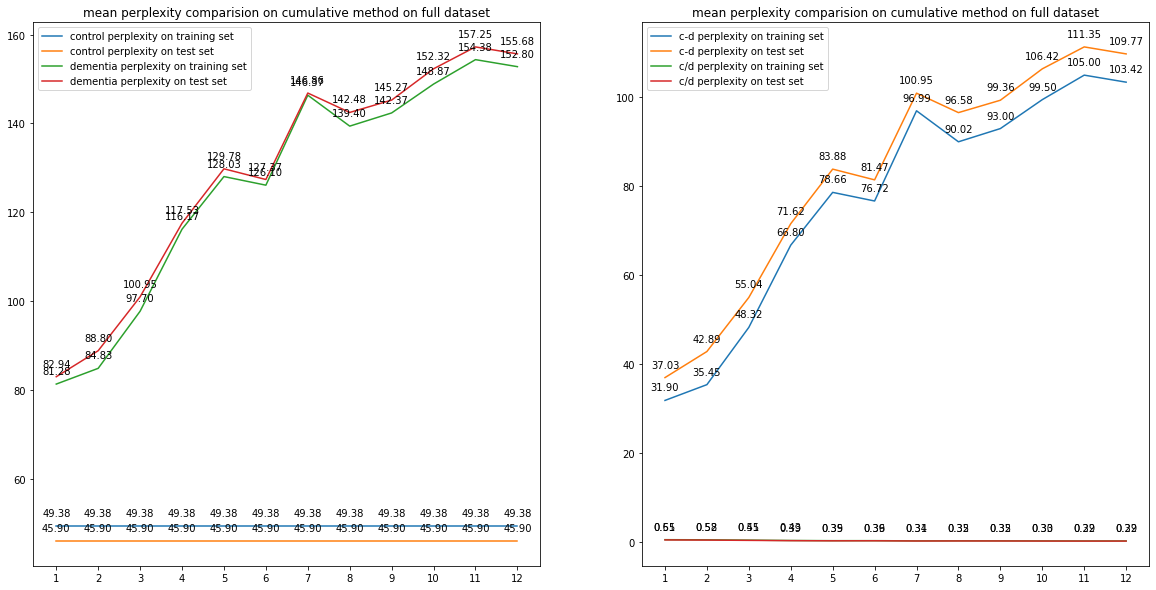

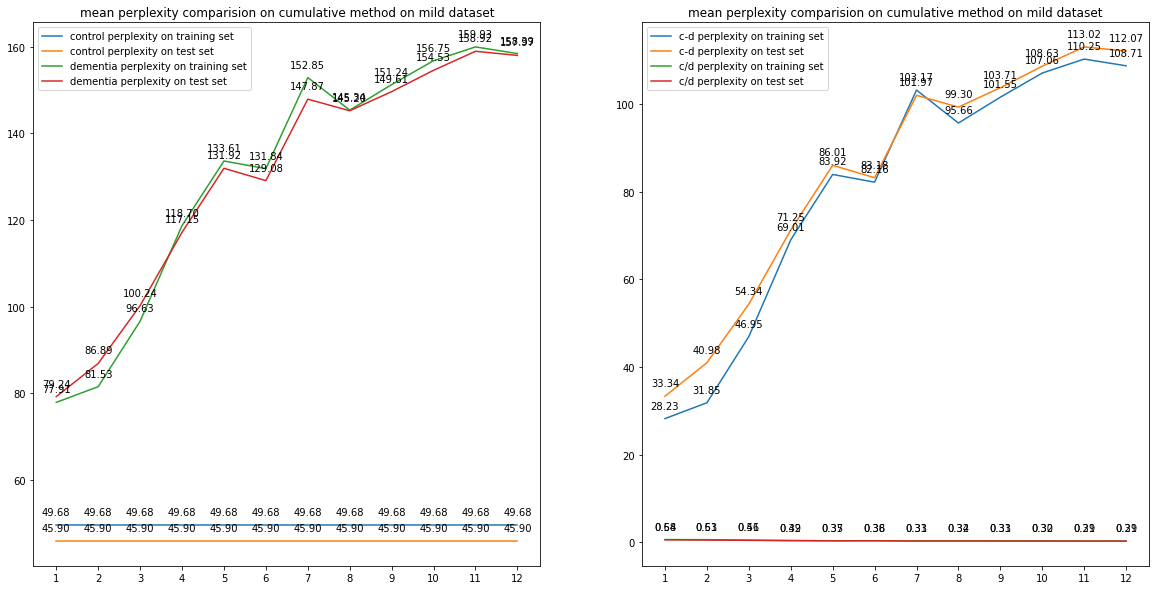

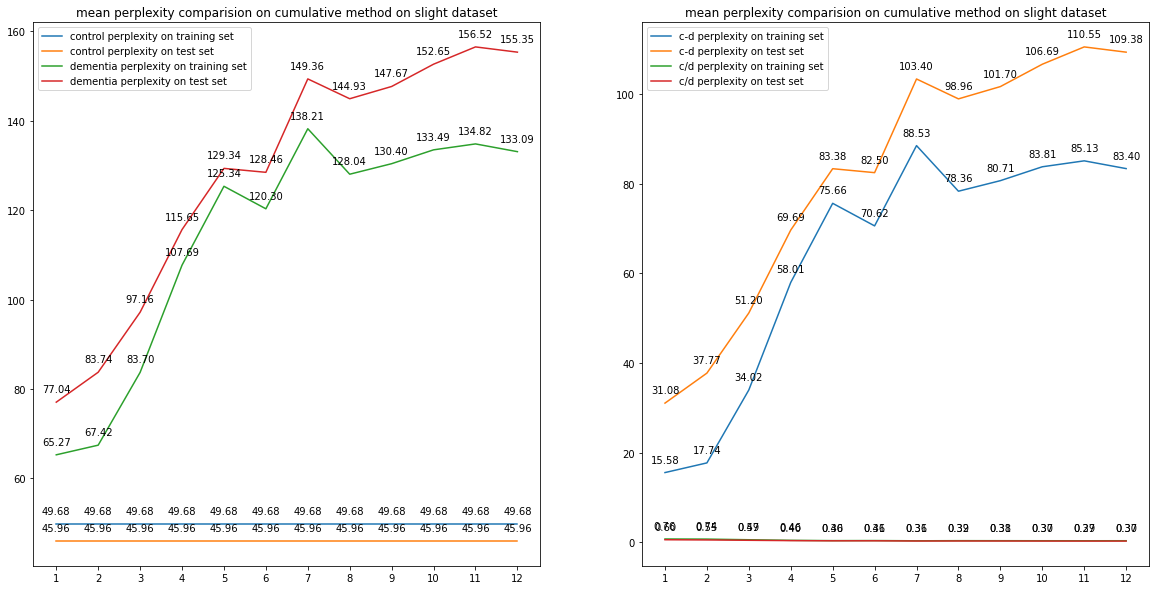

In [3]:
plt.rcParams["figure.figsize"] = (20,10)
accumu_perp_plots(50, "full")
accumu_perp_plots(50, "mild")
accumu_perp_plots(50, "slight")

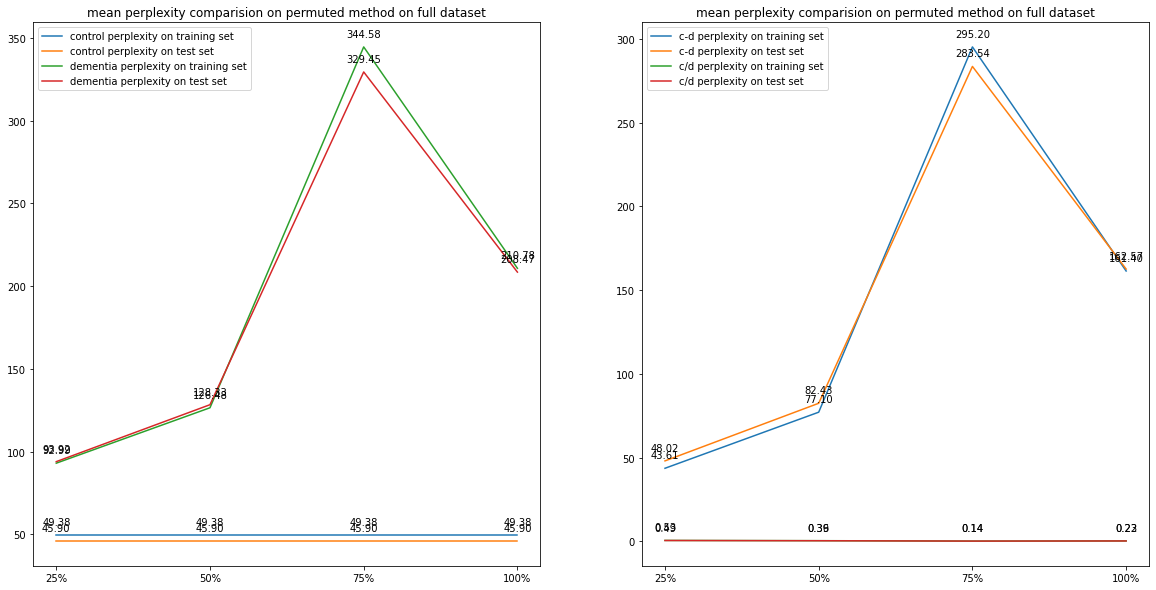

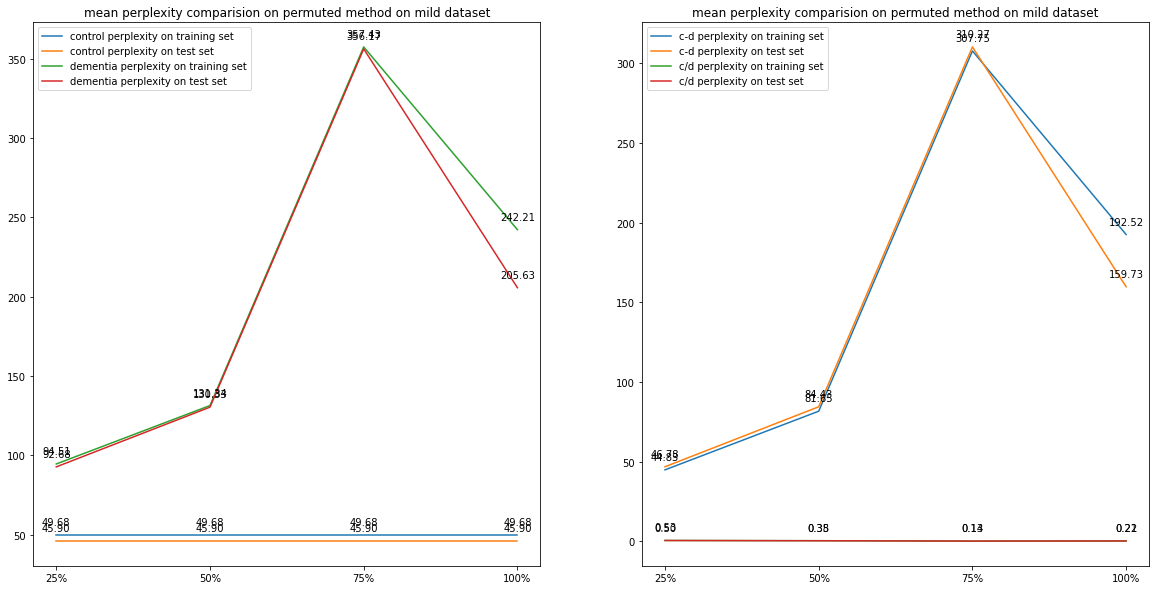

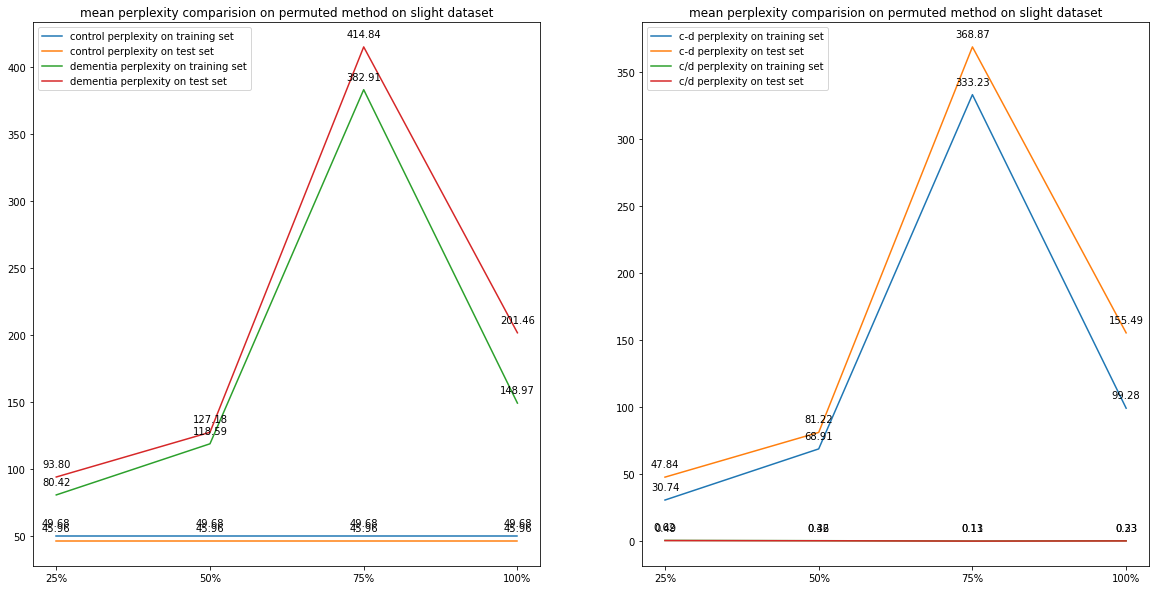

In [4]:
comb_perp_plots("full")
comb_perp_plots("mild")
comb_perp_plots("slight")